<a href="https://colab.research.google.com/github/twotablepush/AiBasic/blob/main/09_%EC%A2%8B%EC%9D%80_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_%EC%8A%A4%ED%82%AC_%EA%B5%90%EC%B0%A8_%EA%B2%80%EC%A6%9D%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%ED%95%98%EC%9D%B4%ED%8D%BC_%EB%A7%A4%EA%B0%9C_%EB%B3%80%EC%88%98_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 좋은 프로그래밍 스킬

1. 모듈화하라
2. 언어의 좋은 특성을 최대한 활용하라
3. 점증적으로 코딩하라
 - 한번에 한가지 기능을 추가하고 옳게 작동하는지 확인하는 일을 반복
4. 디자인 패턴을 몸에 배게 하라
 - 다른 프로그램과 공유하는 디자인 패턴에 대한 눈썰미
5. 도구에 한없이 익숙해져라
 - 통합개발환경인 스차이더 사용법에 익숙, 구글 코렙 추천
 - 라이브러리 사용에 익숙
6. 기초에 충실하라
 - 파이썬의 기초 자료구조인 리스트, 튜플, 딕셔너리
 - 중요한 라이브러리인 numpy
 - 기계 학습의 기초 이론 등


SGD:  0.8585000038146973
Adam:  0.8964499950408935
Adagrad:  0.8341166734695434
RMSprop:  0.8895666599273682


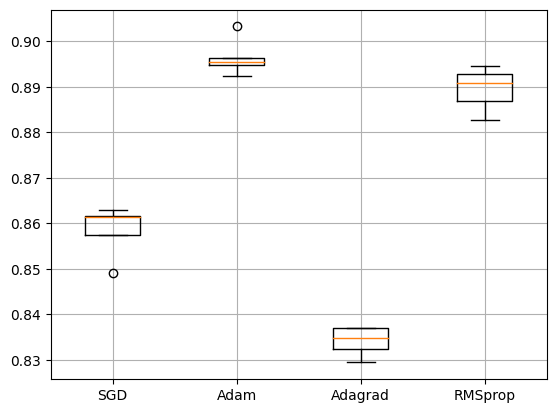

In [6]:
# 교차 검증을 이용한 옵티마이저의 성능 비교: SGD, Adam, Adagrad, RMSprop
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from sklearn.model_selection import KFold

# fashion MNIST를 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망의 구조 설정
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

# 하이퍼 매개변수 설정
batch_size = 256
n_epoch = 20
k = 5

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
    model = Sequential()
    model.add(Dense(units = n_hidden1, activation = 'relu', input_shape = (n_input,)))
    model.add(Dense(units = n_hidden2, activation = 'relu'))
    model.add(Dense(units = n_hidden3, activation = 'relu'))
    model.add(Dense(units = n_hidden4, activation = 'relu'))
    model.add(Dense(units = n_output, activation = 'softmax'))
    return model

# 교차 검증을 해주는 함수(서로 다른 옵티마이저(opt)에 대해)
def cross_validation(opt):
    accuracy = []
    for train_index, val_index in KFold(k).split(x_train):
        xtrain, xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index]
        dmlp = build_model()
        dmlp.compile(loss = 'categorical_crossentropy', optimizer = opt(), metrics = ['accuracy'])
        dmlp.fit(xtrain, ytrain, batch_size = batch_size, epochs = n_epoch, verbose = 0)
        accuracy.append(dmlp.evaluate(xval, yval, verbose = 0)[1])
    return accuracy

# 옵티마이저 4개에 대해 교차 검증을 실행
acc_sgd = cross_validation(lambda: SGD())
acc_adam = cross_validation(lambda: Adam())
acc_adagrad = cross_validation(lambda: Adagrad())
acc_rmsprop = cross_validation(lambda: RMSprop())

# 옵티마이저 4개의 정확률을 비교
print("SGD: ", np.array(acc_sgd).mean())
print("Adam: ", np.array(acc_adam).mean())
print("Adagrad: ", np.array(acc_adagrad).mean())
print("RMSprop: ", np.array(acc_rmsprop).mean())

# 네 옵티마이저의 정확률을 박스플롯으로 비교
import matplotlib.pyplot as plt
plt.boxplot([acc_sgd, acc_adam, acc_adagrad, acc_rmsprop], labels = ['SGD', 'Adam', 'Adagrad', 'RMSprop'])
plt.grid()
plt.show()